# Project Proposal
## Submitted by Parit Vacharaskunee, 6580209

----

### Section 1: Topic and Problem Statement

* Project Title (Not finalized): Meteorite Landings: Patterns and Predictions
* Major problem/research questions:
    - Can we predict when meteorites will hit earth based on previous years?
    - Are there any relationships between the mass of the meteorite and any other data values i.e. mass & landing location?
    - Any models to predict or help classify the type of meteor?
* Rationale for the problem: 
    - Provide insights in classification of meteors
    - Possibility of predicting and/or finding trends
* Objectives:
    - Find relationships from the meteorite landings dataset
    - Apply knowledge of predicitve models for further analysis

----
### Section 2: Introduction
The National Aeronautics and Space Administration, or NASA, is a widely known organization which specializes in aeronautics and space research. Hence, they store very large amounts of data. To take advantage of these data, I believe that doing a project relating to this could prove beneficial. Meteoroids are small rocks in space, which when fallen onto Earth, it would be called meteorites. Meteoroids comes from the asteroid belt, which orbits Mars and Jupiter ([databayou, N.A.](https://databayou.com/meteorite/landings.html)). NASA's Jet Propulsion Laboratory does monitorings and predictions on near-Earth objects, which gives us information about meteors and asteroids. I find that these data could be used to help us further investigate into the types of meteors, or find any possible patterns on these objects.

----
### Section 3: Desribe Research Data


The dataset shown below is obtained from [NASA's Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh/about_data), a website that stores all data from NASA. According to the description, the data set contains information on all the known meteorite landings. Some possible variables that could be used in this project include the mass, the classification type, and the year.

----
### Section 4: EDA

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

There are a total of 10 columns:
* name: name of the meteorites
* id: id of the meteorites
* nametype: check whether name is valid or not
* recclass: classification of the meteorite
* mass: estimated mass of the meteorites in grams (g)
* fall: determine whether the meteorite is fell or found
* year: estimated year the meteorite fell or was founded
* reclat: latitude of the site
* reclong: longitude of the site
* GeoLocation: the combined position of the site

In [3]:
df = pd.read_csv('Meteorite_Landings_20240521.csv')
df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


**Exploring Data**

In [4]:
df.shape # 45716 rows/meteorites, 10 columns/variables

(45716, 10)

In [5]:
df.loc[df.isna().any(axis = 1) == True] # check rows (meteorites) with unknown values

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769.0,50.66667,2.33333,"(50.66667, 2.33333)"
37,Northwest Africa 5815,50693,Valid,L5,256.800,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
38,Angers,2301,Valid,L6,NaN,Fell,1822.0,47.46667,-0.55000,"(47.46667, -0.55)"
76,Barcelona (stone),4944,Valid,OC,NaN,Fell,1704.0,41.36667,2.16667,"(41.36667, 2.16667)"
93,Belville,5009,Valid,OC,NaN,Fell,1937.0,-32.33333,-64.86667,"(-32.33333, -64.86667)"
...,...,...,...,...,...,...,...,...,...,...
45589,Yamato 984028,40648,Valid,Martian (shergottite),12.342,Found,1998.0,NaN,NaN,NaN
45660,Yambo no. 2,30346,Valid,L3,3.200,Found,1975.0,NaN,NaN,NaN
45692,Zacatecas (1969),30382,Valid,"Iron, IIIAB",6660.000,Found,1969.0,NaN,NaN,NaN
45698,Zapata County,30393,Valid,Iron,NaN,Found,1930.0,27.00000,-99.00000,"(27.0, -99.0)"


The plots below suggest that there are more smaller meteorites that larger ones, as the larger ones fell long before it could be witnessed. Hence, most meteorites with a mass more than 5 tons are found rather than witnessed and recorded as fell.

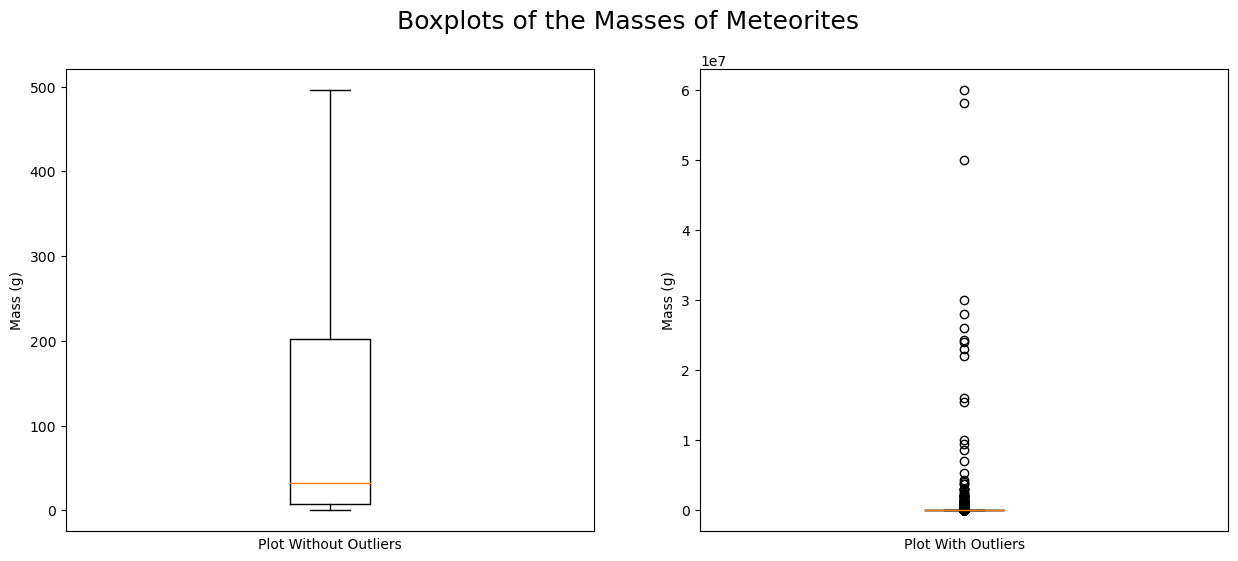

In [6]:
mass = df['mass (g)']
mass = mass.dropna()
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
fig.suptitle('Boxplots of the Masses of Meteorites', fontsize = 18)
ax[0].boxplot(np.asarray(mass), showfliers = False)
ax[0].set_xticks([])
ax[0].set(xlabel = 'Plot Without Outliers', ylabel = 'Mass (g)')
ax[1].boxplot(np.asarray(mass), showfliers = True)
ax[1].set_xticks([])
ax[1].set(xlabel = 'Plot With Outliers', ylabel = 'Mass (g)')
plt.show()

In [7]:
print(f"The median is {np.median(mass)} grams")

The median is 32.6 grams


In [8]:
df.loc[df['mass (g)'] > 5000000] # check meteorites with masses greater than 5000000 grams

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,1947.0,46.16000,134.65333,"(46.16, 134.65333)"
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898.0,47.00000,88.00000,"(47.0, 88.0)"
5016,Bacubirito,4919,Valid,"Iron, ungrouped",22000000.0,Found,1863.0,26.20000,-107.83333,"(26.2, -107.83333)"
5083,Bendegó,5015,Valid,"Iron, IC",5360000.0,Found,1784.0,-10.11667,-39.20000,"(-10.11667, -39.2)"
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.46667, -60.58333)"
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891.0,35.05000,-111.03333,"(35.05, -111.03333)"
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818.0,76.13333,-64.93333,"(76.13333, -64.93333)"
5468,Chupaderos,5363,Valid,"Iron, IIIAB",24300000.0,Found,1852.0,27.00000,-105.10000,"(27.0, -105.1)"
5613,Cranbourne,5463,Valid,"Iron, IAB-MG",8600000.0,Found,1854.0,-38.10000,145.30000,"(-38.1, 145.3)"
12613,Gibeon,10912,Valid,"Iron, IVA",26000000.0,Found,1836.0,-25.50000,18.00000,"(-25.5, 18.0)"


Looking through the year column, there are meteorites that fell long before technology. This could be due to the estimation from the landing and the age of the rocks. The oldest one that was recorded was Nogata. By further research, the Nogata meteorite is known to be the oldest frament associated with sighting of a meteor fall [(Nogata Meteorite)](https://en.wikipedia.org/wiki/N%C5%8Dgata_meteorite).

In [9]:
df.loc[df['year'] < 1500.0] # check meteorites that was found/fell before the year 1500

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.18333, 12.73333)"
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)"
679,Narni,16914,Valid,Stone-uncl,NaN,Fell,920.0,42.51667,12.51667,"(42.51667, 12.51667)"
704,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725, 130.75)"
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490.0,45.48333,9.51667,"(45.48333, 9.51667)"
1043,Valdinoce,24146,Valid,Stone-uncl,NaN,Fell,1495.0,44.06667,12.10000,"(44.06667, 12.1)"


We can also look further in the geolocation of most of the landings (A.K.A. the average landing locations). It can be seen that most landings occured near latitudes $< -70$, and on longitudes around $0-50$. More investigation may be done later on when analyzing EDA.

[Text(0.5, 0, 'Longitude'), Text(0, 0.5, 'Count')]

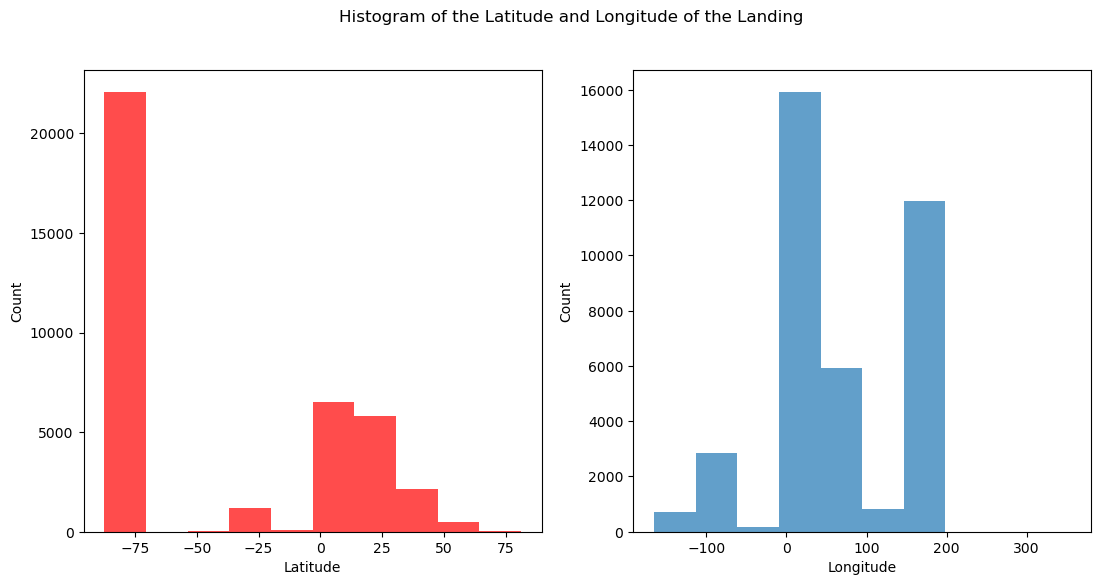

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (13, 6))
fig.suptitle('Histogram of the Latitude and Longitude of the Landing')
ax[0].hist(df['reclat'], color = 'red', alpha = 0.7)
ax[0].set(xlabel = 'Latitude', ylabel = 'Count')
ax[1].hist(df['reclong'], alpha = 0.7)
ax[1].set(xlabel = 'Longitude', ylabel = 'Count')

In [11]:
df.loc[df['reclat'] < -70.0] # latitude >= -70.0

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
1640,Allan Hills 06001,44858,Valid,H5,128.10,Found,2006.0,-76.71695,158.76862,"(-76.71695, 158.76862)"
1641,Allan Hills 06002,44859,Valid,H~5,119.20,Found,2006.0,-76.74253,158.84305,"(-76.74253, 158.84305)"
1642,Allan Hills 06003,44860,Valid,H~5,25.00,Found,2006.0,-76.71128,158.79283,"(-76.71128, 158.79283)"
1643,Allan Hills 06004,44861,Valid,H~5,61.70,Found,2006.0,-76.70522,158.77838,"(-76.70522, 158.77838)"
1644,Allan Hills 06005,44862,Valid,H~5,6.00,Found,2006.0,-76.70522,158.77838,"(-76.70522, 158.77838)"
...,...,...,...,...,...,...,...,...,...,...
43683,Yamato 980318,30340,Valid,Eucrite-cm,166.81,Found,1998.0,-71.50000,35.66667,"(-71.5, 35.66667)"
43764,Yamato 980459,30341,Valid,Martian (shergottite),82.46,Found,1998.0,-72.09802,35.24265,"(-72.09802, 35.24265)"
43983,Yamato 981031,30342,Valid,Lunar (anorth),185.80,Found,1998.0,-71.54694,35.40194,"(-71.54694, 35.40194)"
44210,Yamato 981651,30343,Valid,Eucrite,235.88,Found,1998.0,-71.50000,35.66667,"(-71.5, 35.66667)"


In [12]:
df.loc[(df['reclong'] >= 0) & (df['reclong'] <= 50.0)] # longitudes between 0.0 - 50.0

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.21667, 0.61667)"
11,Aïr,424,Valid,L6,24000.0,Fell,1925.0,19.08333,8.38333,"(19.08333, 8.38333)"
12,Aire-sur-la-Lys,425,Valid,Unknown,NaN,Fell,1769.0,50.66667,2.33333,"(50.66667, 2.33333)"
...,...,...,...,...,...,...,...,...,...,...
45710,Zillah 001,31355,Valid,L6,1475.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"


Some insights in the amount of meteor landings in each year. This might be one of the few exploratory data that could prove useful when finding trends or patterns in the frequency of meteors in the future.

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Count')]

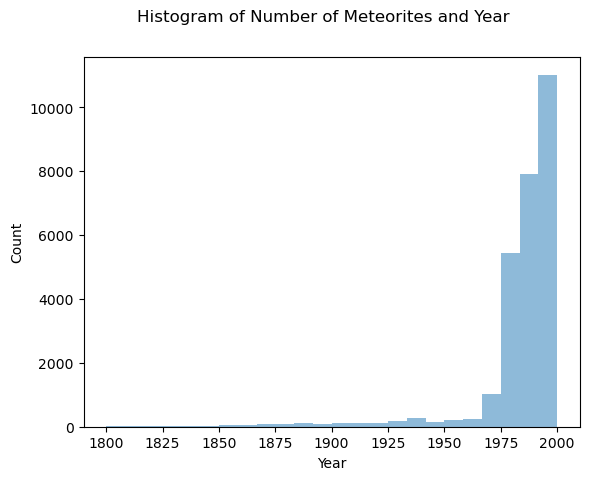

In [91]:
years = df['year'].dropna()
x = np.linspace(1800, 2000, 25)
fig, ax = plt.subplots()
fig.suptitle("Histogram of Number of Meteorites and Year")
ax.hist(years, bins = x, alpha = 0.5)
ax.set(xlabel = 'Year', ylabel = "Count")

More graphs/exploration of data will be performed later as well.

----
### Section 5: Research Design
What will I do with my data?
- Other than diving deeper into each columns to find patterns or trends, I would want to try using machine learning models that might be trained and test to predict the classification of the meteorites judging from the values. 
    - See if there are any clusterings for the classification of the meteorites.
    - Possible look into time series analysis (?)
    - Other models/predicting methods
- Find the average geolocation of the meteors.
- Find trends to estimate when meteors will fall in the future.
- Find any other potential relationships between the variables.

- Random Tree Classifier